# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.cepii.fr/cepii/en/bdd_modele/bdd_modele_item.asp?id=37

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [64]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# boilerplate copy-in for various EDA libraries - can optimize later as needed

df22 = pd.read_csv(r'C:\Users\chris\PycharmProjects\eda-checkpoint\BACI_HS22_V202501 Data\BACI_HS22_Y2022_V202501.csv', dtype={'k':'str'}) # data for 2022

df23 = pd.read_csv(r'C:\Users\chris\PycharmProjects\eda-checkpoint\BACI_HS22_V202501 Data\BACI_HS22_Y2023_V202501.csv', dtype={'k':'str'}) # data for 2023

country_codes = pd.read_csv(r'C:\Users\chris\PycharmProjects\eda-checkpoint\BACI_HS22_V202501 Data\country_codes_V202501.csv') # country code keys

product_codes = pd.read_csv(r'C:\Users\chris\PycharmProjects\eda-checkpoint\BACI_HS22_V202501 Data\product_codes_HS22_V202501.csv', dtype= str) # product code keys

# used absolute paths for absolute certainty

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [65]:
df22.head() # where
# List of Variables:
# t: year
# i: exporter | maps to a value from country_codes
# j: importer | maps to a value from country_codes
# k: product | maps to a value from product_codes
# v: value
# q: quantity

# country_codes.head() # we're only going need a few of these but it's going to be a little nuanced because Taiwan uses a proxy code or two. We'll also need one to determine the global supply of goods we're studying.

# product_codes.head() # again we're only going need a handful of these related to the red-hot chips industry

country_codes.nunique() # just a nice-to-know

product_codes.nunique() # I was curious | 5609 codes, 5604 descriptions

# df22.shape 10,959,569 rows! Pretty cool
# df23.shape 11,232,739 rows

df = pd.concat([df22, df23])

# df.shape # 22192308, 6
#
# country_codes.info()
# product_codes.info()

df.head() # pandas removed my critical leading zeroes. Need to fix. Fixed it

,t,i,j,k,v,q
0,2022,4,20,210610,0.412,0.002
1,2022,4,20,210690,0.070,0.001
2,2022,4,20,271000,6.985,8.103
3,2022,4,20,843131,0.354,0.022
4,2022,4,31,080211,2.250,0.500


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [66]:
rename_map = {
    "t": "year",
    "i": "exporter",
    "j": "importer",
    "k": "product",
    "v": "value",
    "q": "quantity"
}

df = df.rename(columns=rename_map)

df.info()
df.head()

# product_codes.head() # confirming fix

# for readability
# making note to myself to reset the index during cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 22192308 entries, 0 to 11232738
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      int64  
 1   exporter  int64  
 2   importer  int64  
 3   product   object 
 4   value     float64
 5   quantity  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ GB


,year,exporter,importer,product,value,quantity
0,2022,4,20,210610,0.412,0.002
1,2022,4,20,210690,0.070,0.001
2,2022,4,20,271000,6.985,8.103
3,2022,4,20,843131,0.354,0.022
4,2022,4,31,080211,2.250,0.500


In [44]:
print(f"CEPI Data:")
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print('\nProduct Codes:')
for col in product_codes.columns:
    pct_missing = np.mean(product_codes[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print('\nCountry Codes:')
for col in country_codes.columns:
    pct_missing = np.mean(country_codes[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# Used for loops to iterate through both dataframe in order to identify the % of nulls per column - a cleaner way to visualize nulls than .info

CEPI Data:
year - 0%
exporter - 0%
importer - 0%
product - 0%
value - 0%
quantity - 4%

Product Codes:
code - 0%
description - 0%

Country Codes:
country_code - 0%
country_name - 0%
country_iso2 - 2%
country_iso3 - 0%


In [45]:
num_duplicate_occurrences = df.duplicated(keep='first').sum()
print("Duplicate rows (excluding first occurrences), CEPI data:", int(num_duplicate_occurrences))

num_duplicate_occurrences = product_codes.duplicated(keep='first').sum()
print("Duplicate rows (excluding first occurrences, product codes):", int(num_duplicate_occurrences))

num_duplicate_occurrences = country_codes.duplicated(keep='first').sum()
print("Duplicate rows (excluding first occurrences, country codes):", int(num_duplicate_occurrences))

# checking for entire-row-level duplicates

Duplicate rows (excluding first occurrences), CEPI data: 0
Duplicate rows (excluding first occurrences, product codes): 0
Duplicate rows (excluding first occurrences, country codes): 0


In [68]:
# product_codes['code length'] = product_codes['code'].str.len()
#
# unique_pc_lengths = product_codes['code length'].unique()
#
# print(unique_pc_lengths) # this was to confirm that all my product codes were 6 digits long

product_codes['description'] = product_codes['description'].str.lower().str.strip()
# standardizes our descriptions for a keyword search

# product_codes = product_codes.drop('code length', axis=1)

# product_codes.head() # confirming my zeroes are back for the second or third time | dropped unnecessary column

keycodes = ['381800', '848610', '848620', '848640', '851419', '852351', '852352', '852359', '854110', '854121', '854129', '854190', '854231', '854232', '854233', '854239', '854290', '903082', '903141']

pd.set_option('display.max_colwidth', None) # widens columns so I can read the whole thing

# applied a custom function using lambda on our product code descriptions after standardizing and building a search list | changed it to keycodes after manually building list of relevant keycodes
mask = product_codes['code'].apply(lambda x: any(keycode in x for keycode in keycodes))
candidates = product_codes[mask].copy()

# candidates_by_ch85 = product_codes[product_codes['code'].str.startswith('85')]
# candidates_by_ch85 checking chapter 85 of the data: electronics

product_totals = df.groupby('product')['value'].sum().rename('world_value').reset_index()

candidates = candidates.merge(product_totals, left_on='code', right_on='product', how='left').fillna(0)
candidates = candidates.sort_values('world_value', ascending=False)

candidates # these produce our world values per product code we selected

,code,description,product,world_value
12,854231,"electronic integrated circuits: processors and controllers, whether or not combined with memories, converters, logic circuits, amplifiers, clock and timing circuits, or other circuits",854231,7.862402e+08
15,854239,electronic integrated circuits: n.e.c. in heading no. 8542,854239,6.343637e+08
13,854232,electronic integrated circuits: memories,854232,3.856415e+08
2,848620,machines and apparatus of a kind used solely or principally for the manufacture of semiconductor devices or of electronic integrated circuits,848620,1.463427e+08
5,852351,"semiconductor media: solid-state non-volatile storage devices, whether or not recorded, excluding products of chapter 37",852351,8.237666e+07
10,854129,"electrical apparatus: transistors, (other than photosensitive), with a dissipation rate of 1w or more",854129,5.737767e+07
16,854290,parts of electronic integrated circuits,854290,4.831830e+07
0,381800,"chemical elements: doped for use in electronics, in the form of discs, wafers or similar forms: chemical compounds doped for use in electronics",381800,4.182100e+07
14,854233,electronic integrated circuits: amplifiers,854233,4.158070e+07
8,854110,"electrical apparatus: diodes, other than photosensitive or light-emitting diodes (led)",854110,2.434479e+07


In [ ]:
# Relevant product codes:

# eda_candidates_keycodes = [381800, 848610, 848620, 848640, 851419, 852351, 852352, 852359, 854110, 854121, 854129, 854190, 854231, 854232, 854233, 854239, 854290, 903082, 903141]

<BarContainer object of 5 artists>

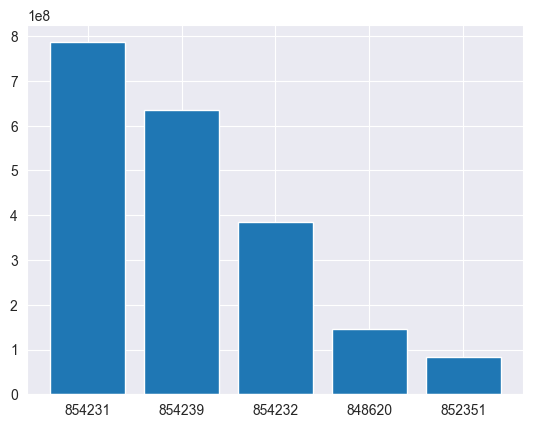

In [76]:
# Visualize relevant product codes

top_five_products = candidates.head(5)

plt.bar(top_five_products['code'], top_five_products['world_value'])

# whole world is candidates

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? No. It's delightfully clean and robust.
2. Do you have any concerns about your dataset? No, it seems really high quality and I'm excited to work with it.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? Yes, I'm going to need to make two giant concatenated and merged dataframes: one for global values and one for Taiwan. I will want to make the column names more descriptive and filter for product codes related to semiconductor manufacture. Both of which I partially did during the EDA.